In [15]:
import numpy as np 
import matplotlib.pyplot as plt

Tham số lấy từ tài liệu báo cáo.
+ P là tỉ lệ sống của từng giai đoạn.
+ G là tỉ lệ sống khi chuyển giao giai đoạn 
+ F là khả năng sinh sản của từng giai đoạn

In [16]:
P= np.array([0,0.7371,0.6611,0.6907,0,0,0.8088])
G = np.array([0.6747,0.0486,0.0147,0.0518,0.8091,0.8091,0])
F = np.array([0,0,0,0,127,4,80])


A = np.array([
    [P[0],F[1],F[2],F[3],F[4],F[5],F[6]],
    [G[0],P[1],0,0,0,0,0],
    [0,G[1],P[2],0,0,0,0],
    [0,0,G[2],P[3],0,0,0],
    [0,0,0,G[3],P[4],0,0],
    [0,0,0,0,G[4],P[5],0],
    [0,0,0,0,0,G[5],P[6]]
])
np.set_printoptions(precision=4, suppress=True, linewidth=200)
print(f'In ma trận: \n{np.round(A,4)}')

In ma trận: 
[[  0.       0.       0.       0.     127.       4.      80.    ]
 [  0.6747   0.7371   0.       0.       0.       0.       0.    ]
 [  0.       0.0486   0.6611   0.       0.       0.       0.    ]
 [  0.       0.       0.0147   0.6907   0.       0.       0.    ]
 [  0.       0.       0.       0.0518   0.       0.       0.    ]
 [  0.       0.       0.       0.       0.8091   0.       0.    ]
 [  0.       0.       0.       0.       0.       0.8091   0.8088]]


## Tính $\lambda$, ý nghĩa mức độ tăng trưởng trong quần thể qua tường năm. 


In [17]:
#  hàm tính lambda 
def cal_grow_rate(matrix):
    vals, vecs = np.linalg.eig(matrix)
    lambda_  = np.max(vals.real)
    return lambda_

In [18]:
print(f'tỉ lệ tăng trưởng trong quần thể: {cal_grow_rate(A)}')

tỉ lệ tăng trưởng trong quần thể: 0.9450443264296111


Nói rõ hơn về giá trị tham số $\lambda$ này.
+ ý nghĩa nói lên mức độ tăng trưởng trong quần thể.
+ $\lambda < 1 $ : nghĩa là quần thể đang giảm đi số lượng qua từng năm.
+ $\lambda = 1 $ : nghĩa là quần thể này ổn định không có tăng hay giảm qua từng năm.
+ $\lambda > 1$ : nghĩa là quần thể tăng trưởng qua từng năm.

Củ thể hơn trong quần thể rùa quảng đông này thì $\lambda = 0.945 < 1$ thì quần thể rùa đang giảm gần bằng 5.5% số lượng quần thể qua các năm. Nếu để yên tình trạng này xảy ra thì quần thể sẽ bị tiệt chủng.  

### Giả định Giảm

Giả định: nếu chúng ta giảm tỷ lệ sống sót ở giai đoạn trứng lên con non 50% thì liệu mức độ nó có thay đổi không.

In [19]:
A_modifi = A.copy()
A_modifi[0,4] *= 0.5
A_modifi[0,5] *= 0.5
A_modifi[0,6] *= 0.5
A_modifi[1,0] *= 0.5

print(f'tỷ lệ tăng trưởng của quần thể gốc: \n{cal_grow_rate(A)}')
print(f'tỷ lệ tăng trưởng của quần thể giả định: \n{cal_grow_rate(A_modifi)}')
print(f"trên lệch tỷ lệ tăng trưởng thực tế và giả định: {cal_grow_rate(A) - cal_grow_rate(A_modifi) } ")


tỷ lệ tăng trưởng của quần thể gốc: 
0.9450443264296111
tỷ lệ tăng trưởng của quần thể giả định: 
0.888846758396149
trên lệch tỷ lệ tăng trưởng thực tế và giả định: 0.0561975680334621 


Giả định: nếu ta giảm tỉ lệ sống sót của con non và sinh sản 50%

In [20]:
A_modifi = A.copy()
A_modifi[0,4] *= 0.5
A_modifi[0,5] *= 0.5
A_modifi[0,6] *= 0.5
A_modifi[1,1] *= 0.5
A_modifi[2,2] *= 0.5
A_modifi[3,3] *= 0.5
print(f'tỷ lệ tăng trưởng của quần thể gốc: \n{cal_grow_rate(A)}')
print(f'tỷ lệ tăng trưởng của quần thể giả định: \n{cal_grow_rate(A_modifi)}')
print(f"trên lệch tỷ lệ tăng trưởng thực tế và giả định: {cal_grow_rate(A) - cal_grow_rate(A_modifi) } ")

tỷ lệ tăng trưởng của quần thể gốc: 
0.9450443264296111
tỷ lệ tăng trưởng của quần thể giả định: 
0.8203351325234591
trên lệch tỷ lệ tăng trưởng thực tế và giả định: 0.12470919390615198 


Giả định: nếu ta giảm tỉ lệ sinh sản của và tỉ lệ sống của rùa già thì sao??? 

In [21]:
A_modifi = A.copy()
A_modifi[0,4] *= 0.5
A_modifi[0,5] *= 0.5
A_modifi[0,6] *= 0.5
A_modifi[6,6] *= 0.5

print(f'tỷ lệ tăng trưởng của quần thể gốc: \n{cal_grow_rate(A)}')
print(f'tỷ lệ tăng trưởng của quần thể giả định: \n{cal_grow_rate(A_modifi)}')
print(f"trên lệch tỷ lệ tăng trưởng thực tế và giả định: {cal_grow_rate(A) - cal_grow_rate(A_modifi) } ")

tỷ lệ tăng trưởng của quần thể gốc: 
0.9450443264296111
tỷ lệ tăng trưởng của quần thể giả định: 
0.8633022473210621
trên lệch tỷ lệ tăng trưởng thực tế và giả định: 0.08174207910854903 


### Giả định: nếu ta tăng tỉ lệ sống sót và sinh sản?

tăng giai đoạn con non giai đoạn 2 - 4

In [22]:
A_modifi = A.copy()
A_modifi[0,4] *= 1.5
A_modifi[0,5] *= 1.5
A_modifi[0,6] *= 1.5
A_modifi[1,1] *= 1.5
A_modifi[2,2] *= 1.5
A_modifi[3,3] *= 1.5

print(f'tỷ lệ tăng trưởng của quần thể gốc: \n{cal_grow_rate(A)}')
print(f'tỷ lệ tăng trưởng của quần thể giả định: \n{cal_grow_rate(A_modifi)}')
print(f"trên lệch tỷ lệ tăng trưởng thực tế và giả định: {cal_grow_rate(A) - cal_grow_rate(A_modifi) } ")

tỷ lệ tăng trưởng của quần thể gốc: 
0.9450443264296111
tỷ lệ tăng trưởng của quần thể giả định: 
1.2296856098232178
trên lệch tỷ lệ tăng trưởng thực tế và giả định: -0.2846412833936067 


Tăng tỉ lệ trứng sinh ra con non

In [23]:
A_modifi = A.copy()
A_modifi[0,4] *= 1.5
A_modifi[0,5] *= 1.5
A_modifi[0,6] *= 1.5
A_modifi[1,0] *= 1.5

print(f'tỷ lệ tăng trưởng của quần thể gốc: \n{cal_grow_rate(A)}')
print(f'tỷ lệ tăng trưởng của quần thể giả định: \n{cal_grow_rate(A_modifi)}')
print(f"trên lệch tỷ lệ tăng trưởng thực tế và giả định: {cal_grow_rate(A) - cal_grow_rate(A_modifi) } ")

tỷ lệ tăng trưởng của quần thể gốc: 
0.9450443264296111
tỷ lệ tăng trưởng của quần thể giả định: 
0.9883303619409697
trên lệch tỷ lệ tăng trưởng thực tế và giả định: -0.04328603551135857 


tăng giai đoạn con trưởng thành

In [24]:
A_modifi = A.copy()
A_modifi[4,4] *= 1.5
A_modifi[0,4] *= 1.5
A_modifi[0,5] *= 1.5
A_modifi[0,6] *= 1.5

print(f'tỷ lệ tăng trưởng của quần thể gốc: \n{cal_grow_rate(A)}')
print(f'tỷ lệ tăng trưởng của quần thể giả định: \n{cal_grow_rate(A_modifi)}')
print(f"trên lệch tỷ lệ tăng trưởng thực tế và giả định: {cal_grow_rate(A) - cal_grow_rate(A_modifi) } ")

tỷ lệ tăng trưởng của quần thể gốc: 
0.9450443264296111
tỷ lệ tăng trưởng của quần thể giả định: 
0.965609755927043
trên lệch tỷ lệ tăng trưởng thực tế và giả định: -0.020565429497431897 


tăng giai đoan rùa già 

In [25]:
A_modifi = A.copy()
A_modifi[6,6] *= 1.5
A_modifi[0,4] *= 1.5
A_modifi[0,5] *= 1.5
A_modifi[0,6] *= 1.5

print(f'tỷ lệ tăng trưởng của quần thể gốc: \n{cal_grow_rate(A)}')
print(f'tỷ lệ tăng trưởng của quần thể giả định: \n{cal_grow_rate(A_modifi)}')
print(f"trên lệch tỷ lệ tăng trưởng thực tế và giả định: {cal_grow_rate(A) - cal_grow_rate(A_modifi) } ")

tỷ lệ tăng trưởng của quần thể gốc: 
0.9450443264296111
tỷ lệ tăng trưởng của quần thể giả định: 
1.2208813027973853
trên lệch tỷ lệ tăng trưởng thực tế và giả định: -0.27583697636777416 


## Kết luận

Từ những giả địnht trên ta kết luận được là 

Độ co giản của quần thể nằm chủ yếu ở giai đoạn con non, con gần trưởng thành và trưởng thành.

Nhất là ở giai đoạn con non , gần trưởng thành và trưởng thành:
+ khi thay đổi tỷ lệ sống sót của cá thể thì tỷ lệ ở 3 giai đoạn đó ảnh hưởng tới giá trị $\lambda$ nhất.

Khi tăng tỷ lệ ở giai đoạn trứng đẻ ra con thì $\lambda$ có tăng lên nhưng vẫn $< 1$

Khi tăng tỷ lệ ở giai đoạn con và trưởng thành và gần trưởng thành $\lambda > 1$  tương tự vậy tăng tỷ lệ sống của rùa già cũng làm cho $\lambda > 1$ 

Từ đây ta thấy được độ co giản của ma trận.

Để có thể bảo tồn được quần thể rùa quảng đông này thì ý định đầu tiên và hầu như là ai cũng nghĩ đến là cố gắng bảo vệ và đạm bảo là tỷ lệ để trứng rùa sinh ra con non thì sẽ đảm bảo được sự ổn định của quần thể.

Từ những giả định trên đã bác bỏ cái ý nghĩ đó: và giả định thể hiện rằng là ta cần phải bảo vệ các cá thể ở giai đoạn con non và trưởng thành và gần trưởng thành vì những cá thể này ảnh hưởng trực tiếp đến tỷ lệ tăng trưởng của quần thể.



## Tính giá trị và vector riêng

In [26]:


# 1. Tính Vector riêng phải (Stable stage distribution - w)
vals, vecs = np.linalg.eig(A)
idx_right = np.argmax(vals.real) # Tìm vị trí trị riêng lớn nhất cho A
lambda1 = vals[idx_right].real

w = vecs[:, idx_right].real
w = np.abs(w)      # Lấy trị tuyệt đối cho chắc chắn
w = w / np.sum(w)  # Chuẩn hóa tổng = 1 (để ra %)

# 2. Tính Vector riêng trái (Reproductive values - v)
vals_left, vecs_left = np.linalg.eig(A.T)
idx_left = np.argmax(vals_left.real) # QUAN TRỌNG: Tìm vị trí trị riêng lớn nhất RIÊNG cho A.T

v = vecs_left[:, idx_left].real
v = np.abs(v)      # Lấy trị tuyệt đối (khắc phục lỗi âm)

# Chuẩn hóa
# Bạn chỉ cần chia cho v[0] để so sánh tương đối với trứng (Stage 1 = 1)
v = v / v[0]     

print(f"λ = {lambda1:.4f}")
print("\nStable stage distribution (%):\n", np.round(w * 100, 3))
print("Reproductive values (relative):\n", np.round(v, 3))

λ = 0.9450

Stable stage distribution (%):
 [20.643 66.978 11.464  0.663  0.036  0.031  0.185]
Reproductive values (relative):
 [  1.      1.401   5.993 115.763 568.408 506.947 587.18 ]


Trên đây là vector riêng $v$ và $\omega$

$\vec{v}$ : (Stable stage distribution)  vector thể hiện sự phân bố của các giai đoạn trong quần thể.

$\vec{\omega}$ : (reproductive values) vector thể hiện giá trị của giai đoạn đó trong quần thể.

Cụ thể hơn là: 
+ Stable stage distribution: 
    + Trong một quần thể thì có 20% là trứng, 66% là con non, 11% là con gần trưởng thành, còn lại là của các giai đoạn khác.
    + Ta thấy được là con non chiếm nhiều số lượng nhất trong quần thể.
+ Reproductive values: 
    + ở đây giá trị của trứng là 1.
    + ta thấy được là cá thể trưởng thành là 115.763 nói đơn giản là giá trị của 1 con trưởng thành bằng 115 quả trứng. 
    + và các cá thể trưởng thành và trưởng thành và già có giá trị rất cao trong quần thể. 

Từ đây lại càng củng cố hơn cho ta thề việc ưu tiên đảm bảo các cá thể non và gần trưởng thành vì đây là nguồn cá thể sẽ có giá trị sau này và chúng cũng chiếm rất nhiều trong quần thể, thế nên nếu tỷ lệ sông sót của hai giai đoạn trên càng cao thì tỉ lệ chúng trưởng thành và mang lại giá trị càng lớn. còn các giai đoạn trưởng thành và già tuy chúng có giá trị rất cao có thể nói là cao nhất nhưng chúng chiếm khá ít trong quần thể nên giá trị của chúng cũng bị loãn đi.




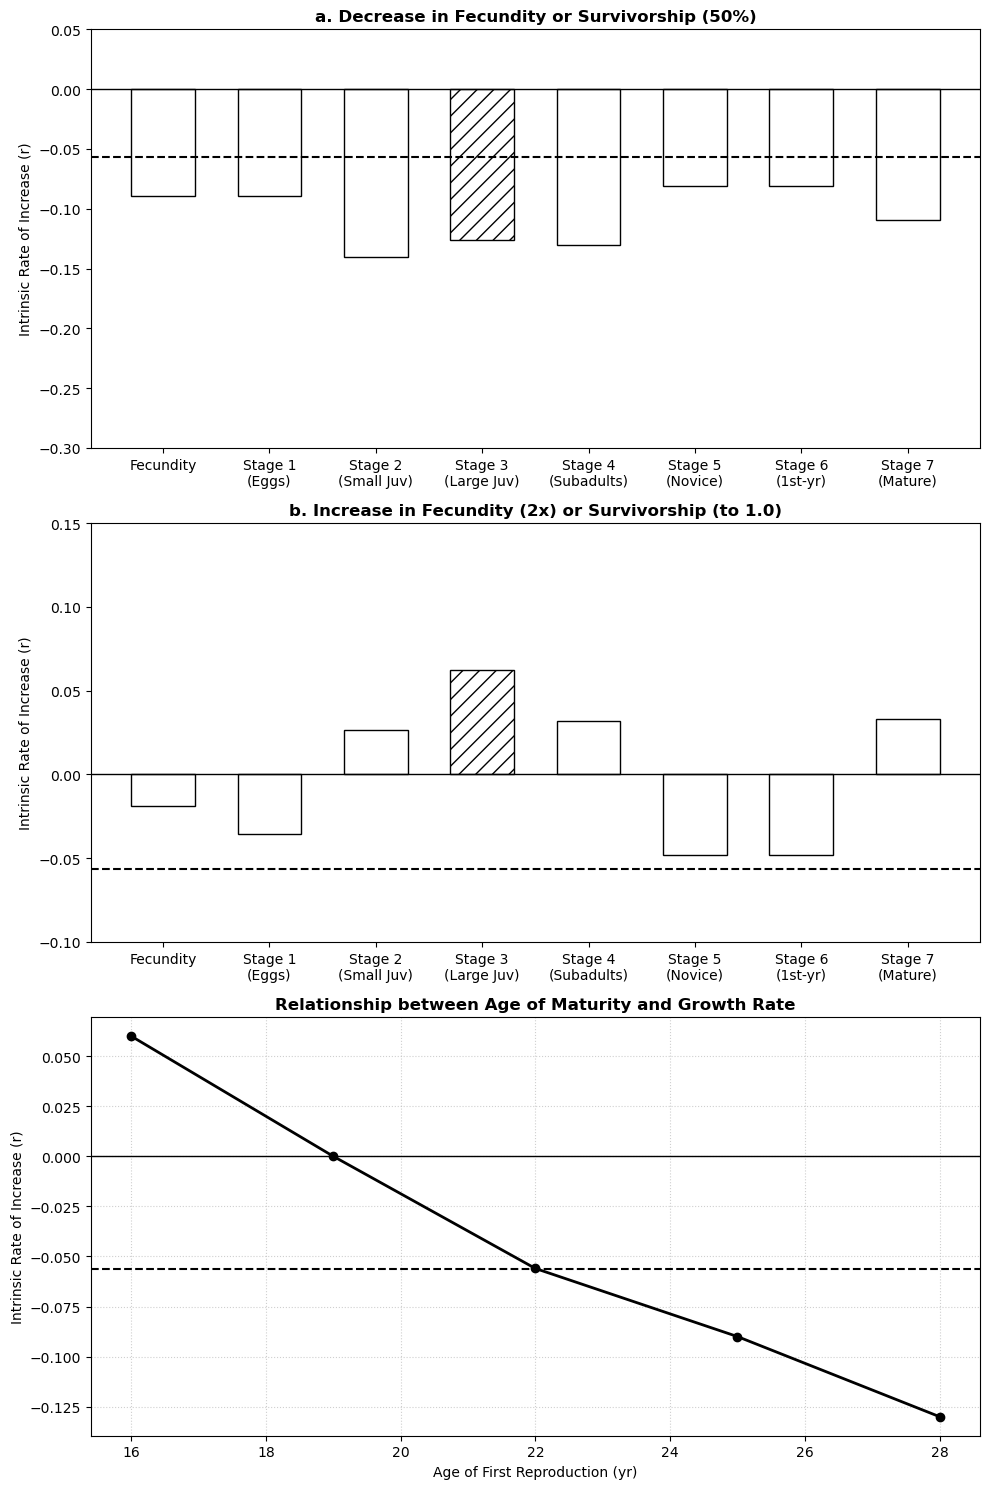

In [27]:


# --- 1. KHỞI TẠO DỮ LIỆU GỐC (Theo ảnh bạn cung cấp) ---
# P: Tỷ lệ sống và ở lại
P = np.array([0, 0.7371, 0.6611, 0.6907, 0, 0, 0.8089])
# G: Tỷ lệ sống và lớn lên
G = np.array([0.6747, 0.0486, 0.0147, 0.0518, 0.8091, 0.8091, 0])
# F: Khả năng sinh sản
F = np.array([0, 0, 0, 0, 127, 4, 80])

# Hàm tạo ma trận từ P, G, F
def create_matrix(P, G, F):
    m = np.zeros((7, 7))
    # Hàng 0: Fecundity
    m[0, :] = F
    # Đường chéo chính: P
    for i in range(7):
        m[i, i] = P[i]
    # Đường chéo phụ: G
    for i in range(6):
        m[i+1, i] = G[i]
    return m

# Hàm tính r (Intrinsic rate of increase) = ln(lambda)
def calculate_r(matrix):
    vals, _ = np.linalg.eig(matrix)
    lam = np.max(vals.real)
    return np.log(lam)

# Tạo ma trận gốc và tính r cơ sở
A_base = create_matrix(P, G, F)
r_base = calculate_r(A_base)

# --- 2. MÔ PHỎNG CHO HÌNH 1A (GIẢM 50%) ---
labels = ['Fecundity', 'Stage 1\n(Eggs)', 'Stage 2\n(Small Juv)', 'Stage 3\n(Large Juv)', 
          'Stage 4\n(Subadults)', 'Stage 5\n(Novice)', 'Stage 6\n(1st-yr)', 'Stage 7\n(Mature)']
r_values_a = []

# Trường hợp 1: Giảm Fecundity 50%
F_new = F * 0.5
r_values_a.append(calculate_r(create_matrix(P, G, F_new)))

# Trường hợp 2-8: Giảm Survival (P và G) của từng giai đoạn 50%
for i in range(7):
    P_new = P.copy()
    G_new = G.copy()
    P_new[i] *= 0.5
    if i < 6: G_new[i] *= 0.5 # Giai đoạn cuối không có G
    r_values_a.append(calculate_r(create_matrix(P_new, G_new, F)))

# --- 3. MÔ PHỎNG CHO HÌNH 1B (TĂNG TỐI ĐA / GẤP ĐÔI) ---
r_values_b = []

# Trường hợp 1: Tăng Fecundity gấp đôi (hoặc 50% tùy giả định, ở đây chọn gấp đôi theo bài báo)
F_high = F * 2.0
r_values_b.append(calculate_r(create_matrix(P, G, F_high)))

# Trường hợp 2-8: Tăng Survival lên 1.0 (Bất tử trong giai đoạn đó)
for i in range(7):
    P_new = P.copy()
    G_new = G.copy()
    # Giả lập tổng P + G = 1.0 (Tối ưu hóa lý thuyết)
    # Ta giữ tỷ lệ giữa P và G như cũ, nhưng scale tổng lên 1
    total = P[i] + (G[i] if i < 6 else 0)
    if total > 0:
        factor = 1.0 / total
        P_new[i] *= factor
        if i < 6: G_new[i] *= factor
    r_values_b.append(calculate_r(create_matrix(P_new, G_new, F)))

# --- 4. DỮ LIỆU GIẢ LẬP CHO HÌNH 2 (AGE OF REPRODUCTION) ---
# Phần này cần thay đổi cấu trúc ma trận phức tạp, nên ta dùng dữ liệu xấp xỉ từ biểu đồ gốc để vẽ
age_x = [16, 19, 22, 25, 28] # Tuổi trưởng thành
r_y =   [0.06, 0.00, -0.056, -0.09, -0.13] # Giá trị r tương ứng (ước lượng từ ảnh)

# --- 5. VẼ BIỂU ĐỒ ---
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# >>> Biểu đồ 1a: Decrease in Fecundity or Survivorship
axes[0].bar(labels, r_values_a, color='white', edgecolor='black', width=0.6)
axes[0].axhline(y=r_base, color='black', linestyle='--', label='Base run')
axes[0].axhline(y=0, color='black', linewidth=1)
axes[0].set_title('a. Decrease in Fecundity or Survivorship (50%)', fontweight='bold')
axes[0].set_ylabel('Intrinsic Rate of Increase (r)')
axes[0].set_ylim(-0.3, 0.05)

# >>> Biểu đồ 1b: Increase in Fecundity or Survivorship
axes[1].bar(labels, r_values_b, color='white', edgecolor='black', width=0.6)
axes[1].axhline(y=r_base, color='black', linestyle='--', label='Base run')
axes[1].axhline(y=0, color='black', linewidth=1)
axes[1].set_title('b. Increase in Fecundity (2x) or Survivorship (to 1.0)', fontweight='bold')
axes[1].set_ylabel('Intrinsic Rate of Increase (r)')
axes[1].set_ylim(-0.1, 0.15)

# Tô đậm cột quan trọng (Large Juveniles) để giống bài báo
axes[0].patches[3].set_hatch('//')
axes[1].patches[3].set_hatch('//')

# >>> Biểu đồ 2: Age of First Reproduction
axes[2].plot(age_x, r_y, marker='o', color='black', linewidth=2)
axes[2].axhline(y=0, color='black', linewidth=1)
axes[2].axhline(y=r_base, color='black', linestyle='--', label='Base run')
axes[2].set_title('Relationship between Age of Maturity and Growth Rate', fontweight='bold')
axes[2].set_xlabel('Age of First Reproduction (yr)')
axes[2].set_ylabel('Intrinsic Rate of Increase (r)')
axes[2].grid(True, linestyle=':', alpha=0.6)

plt.tight_layout()
plt.show()